In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('smartphone_cleaned_v5.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [17]:
pd.set_option('display.max_columns',None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [30]:
df['os'].fillna('others', inplace=True)

In [32]:
imputer = KNNImputer(n_neighbors=5)
df[['fast_charging', 'num_front_cameras', 'primary_camera_front','extended_upto']] = imputer.fit_transform(df[['fast_charging', 'num_front_cameras', 'primary_camera_front','extended_upto']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              980 non-null    float64
 13  ram_capacity               980 non-null    float64

In [35]:
features = ['rating', 'processor_speed', 'ram_capacity',
            'battery_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
            'num_rear_cameras', 'num_front_cameras', 'brand_name_asus','brand_name_blackview',
            'brand_name_blu','brand_name_cat','brand_name_cola','brand_name_doogee','brand_name_duoqin',
            'brand_name_gionee','brand_name_google','brand_name_honor','brand_name_huawei','brand_name_ikall',
            'brand_name_infinix','brand_name_iqoo','brand_name_itel','brand_name_jio','brand_name_lava',
            'brand_name_leeco','brand_name_leitz','brand_name_lenovo','brand_name_letv','brand_name_lg',
            'brand_name_lyf','brand_name_micromax','brand_name_motorola','brand_name_nokia',
            'brand_name_nothing','brand_name_nubia','brand_name_oneplus','brand_name_oppo',
            'brand_name_oukitel','brand_name_poco','brand_name_realme','brand_name_redmi',
            'brand_name_royole','brand_name_samsung','brand_name_sharp','brand_name_sony',
            'brand_name_tcl','brand_name_tecno','brand_name_tesla','brand_name_vertu',
            'brand_name_vivo','brand_name_xiaomi','brand_name_zte','has_ir_blaster_True',
            'extended_memory_available','extended_upto']

In [33]:
target = 'price'

In [34]:
df_encoded = pd.get_dummies(df, columns=['has_5g', 'has_nfc', 'brand_name', 'has_ir_blaster'], drop_first=True)
df_encoded.head()

,model,price,rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,has_5g_True,has_nfc_True,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,brand_name_honor,brand_name_huawei,brand_name_ikall,brand_name_infinix,brand_name_iqoo,brand_name_itel,brand_name_jio,brand_name_lava,brand_name_leeco,brand_name_leitz,brand_name_lenovo,brand_name_letv,brand_name_lg,brand_name_lyf,brand_name_micromax,brand_name_motorola,brand_name_nokia,brand_name_nothing,brand_name_nubia,brand_name_oneplus,brand_name_oppo,brand_name_oukitel,brand_name_poco,brand_name_realme,brand_name_redmi,brand_name_royole,brand_name_samsung,brand_name_sharp,brand_name_sony,brand_name_tcl,brand_name_tecno,brand_name_tesla,brand_name_vertu,brand_name_vivo,brand_name_xiaomi,brand_name_zte,has_ir_blaster_True
0,OnePlus 11 5G,54999,89.0,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,716.8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Samsung Galaxy A14 5G,16499,75.0,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Motorola Moto G62 5G,14999,81.0,snapdragon,8.0,2.2,5000.0,1,56.4,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Realme 10 Pro Plus,24999,82.0,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,1024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X = df_encoded[features]
y = df_encoded[target]
X.head()

,rating,processor_speed,ram_capacity,battery_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,brand_name_honor,brand_name_huawei,brand_name_ikall,brand_name_infinix,brand_name_iqoo,brand_name_itel,brand_name_jio,brand_name_lava,brand_name_leeco,brand_name_leitz,brand_name_lenovo,brand_name_letv,brand_name_lg,brand_name_lyf,brand_name_micromax,brand_name_motorola,brand_name_nokia,brand_name_nothing,brand_name_nubia,brand_name_oneplus,brand_name_oppo,brand_name_oukitel,brand_name_poco,brand_name_realme,brand_name_redmi,brand_name_royole,brand_name_samsung,brand_name_sharp,brand_name_sony,brand_name_tcl,brand_name_tecno,brand_name_tesla,brand_name_vertu,brand_name_vivo,brand_name_xiaomi,brand_name_zte,has_ir_blaster_True,extended_memory_available,extended_upto
0,89.0,3.2,12.0,5000.0,256.0,6.70,120,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,716.8
1,81.0,2.2,6.0,5000.0,128.0,6.59,120,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1024.0
2,75.0,2.4,4.0,5000.0,64.0,6.60,90,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1024.0
3,81.0,2.2,6.0,5000.0,128.0,6.55,120,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1024.0
4,82.0,2.6,6.0,5000.0,128.0,6.70,120,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1024.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42)

In [40]:
best_rf_model = rf_random.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
print(f'Mean Cross-Validation Mean Squared Error: {mse_cv}')

Mean Cross-Validation Mean Squared Error: 969011727.0640793


In [41]:
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 253246429.8275684


In [51]:
#new_smartphone_features = [80.0,2.8,8.0,5000.0,128.0,6.58,90,3,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1024.0]
# One-hot encode the categorical features for the new smartphone
#new_smartphone_encoded = pd.get_dummies(pd.DataFrame([new_smartphone_features], columns=features),
                                       # columns=['brand_name_motorola', 'os_android'],
                                        #drop_first=True)
#new_smartphone_encoded = new_smartphone_features.reindex(columns=X.columns, fill_value=0)  # Ensure the same columns as X
#new_smartphone_scaled = scaler.transform(new_smartphone_features).reshape(-1, 1)
#predicted_price = best_rf_model.predict(new_smartphone_scaled)
#print(f'\nPredicted Price: {predicted_price[0]}')


# ... (previous code)

# Example: Make a price prediction for the new smartphone features
new_smartphone_features = [80.0, 3.0, 12.0, 5000.0, 128.0, 6.58, 90, 3, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1024.0]

# Create a DataFrame from the new smartphone features
new_smartphone_df = pd.DataFrame([new_smartphone_features], columns=features)

# Standardize the features
new_smartphone_scaled = scaler.transform(new_smartphone_df)

# Make predictions for the new smartphone
predicted_price = best_rf_model.predict(new_smartphone_scaled)
print(f'\nPredicted Price for the new smartphone: {predicted_price[0]}')



Predicted Price for the new smartphone: 34839.77904761905


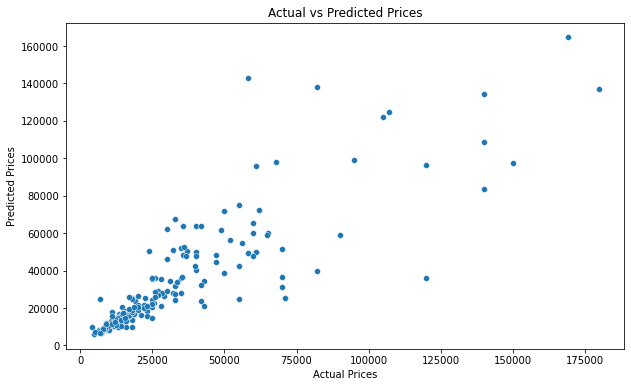

In [52]:
def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted Prices"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.title(title)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.show()
    
plot_actual_vs_predicted(y_test, y_pred)

In [58]:
def plot_feature_importance(feature_importance, features, title="Feature Importance"):
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 15))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.show()

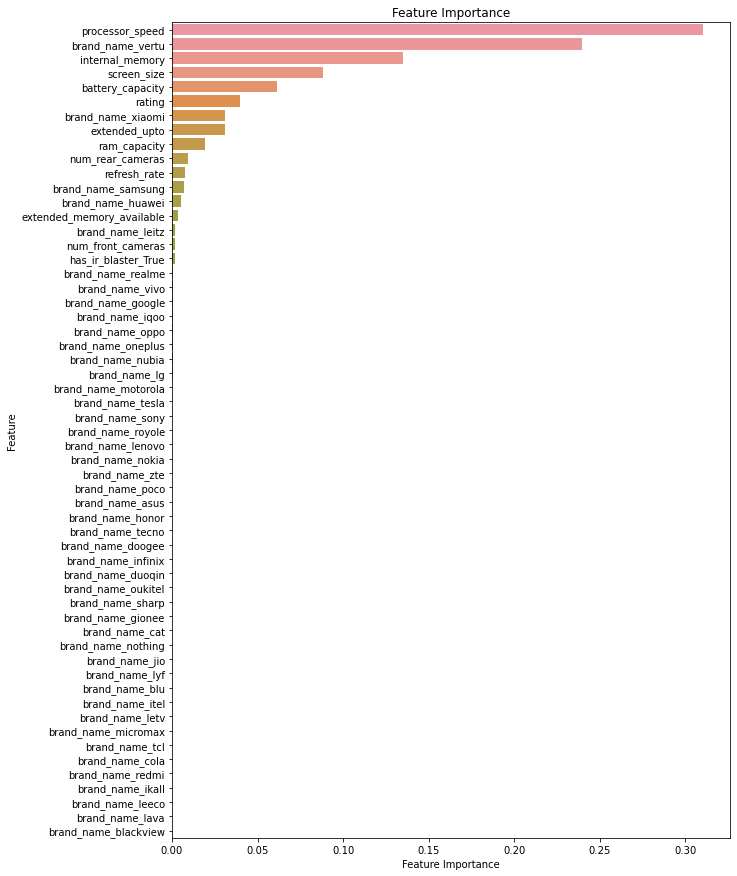

In [59]:
# Get feature importances from the best model
feature_importance = best_rf_model.feature_importances_

# Get feature names from the encoded DataFrame
encoded_features = X.columns

# Plot feature importance
plot_feature_importance(feature_importance, encoded_features, title="Feature Importance")
